In [33]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np


In [34]:
from src.battery import Battery
from src.optimize import run_simulation
from src.load_data import load_data
from src.plot import display_schedule, display_profit, get_stats

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)




# Battery specs :



- SOC: practical state of charge in [0,1] 
- NEC: practical nominal energy capacity (Wh)
- CR: Charging rate (W/Wh)
- DR: Discharging rate (W/Wh)





In [35]:
SOC = np.array([0, 0.01, 0.85, 1.])

# Charging curve
CR = np.array([0.25, 0.5, 0.5, 0.1])

SOC_to_CR_function = interp1d(SOC, CR)

# Discharging curve
SOC = np.array([0., 0.15, 0.99, 1.])
DR = np.array([0.1, 0.5, 0.5, 0.25])

SOC_to_DR_function = interp1d(SOC, DR)

bat = Battery(SOC_to_CR_function, SOC_to_DR_function)


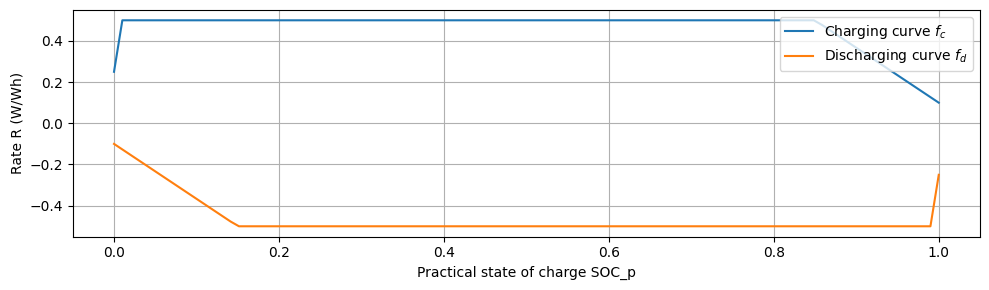

In [36]:
plt.figure(figsize=(10, 3))
plt.plot(np.linspace(0, 1, 100), SOC_to_CR_function(np.linspace(0, 1, 100)), label="Charging curve $f_c$")
plt.plot(np.linspace(0, 1, 100), -SOC_to_DR_function(np.linspace(0,1, 100)), label="Discharging curve $f_d$")
plt.grid(True)
plt.xlabel("Practical state of charge SOC_p")
plt.ylabel("Rate R (W/Wh)")
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig('out/charging_curve.pdf')
plt.show()


# Compute max SOC change in one hour of charge/ discharge

In [37]:
Nint = 5
G_c, G_d = bat.get_max_SOC_change(Nint)


Nint2 = 100
G_c2, G_d2 = bat.get_max_SOC_change(Nint2)

plt.figure(figsize=(10, 3))
plt.grid(True)
plt.plot(np.linspace(0, 1, Nint+1), G_c)
plt.plot(np.linspace(0, 1, Nint2+1), G_c2,
         label="interpolation with {} intervals".format(Nint))
plt.ylabel("Max energy Change $E_{max}$")
plt.xlabel("initial $SOC_p$")
plt.title("Max energy change after one hour of charge")
plt.legend()
plt.tight_layout()
plt.savefig("out/max_energy_change.pdf")
plt.show()


plt.figure(figsize=(10, 3))
plt.grid(True)
plt.plot(np.linspace(0, 1, Nint+1), G_d)
plt.plot(np.linspace(0, 1, Nint2+1), G_d2,
         label="interpolation with {} intervals".format(Nint))
plt.ylabel("Min energy Change $E_{min}$")
plt.xlabel("initial $SOC_p$")
plt.title("Max energy change after one hour of discharge")
plt.legend()
plt.tight_layout()
plt.savefig("out/min_energy_change.pdf")
plt.show()


# Dataset :

In [ ]:
country = 'Germany'

In [ ]:
df = load_data(country=country, start="2021-01-01 00:00:00")
df


,Country,ISO3 Code,timestamp,Datetime (Local),price_euros_wh,vgc,fgc
387912,Germany,DEU,2021-01-01 00:00:00,2021-01-01 01:00:00,0.000048,0.000005,0
387913,Germany,DEU,2021-01-01 01:00:00,2021-01-01 02:00:00,0.000045,0.000005,0
387914,Germany,DEU,2021-01-01 02:00:00,2021-01-01 03:00:00,0.000043,0.000005,0
387915,Germany,DEU,2021-01-01 03:00:00,2021-01-01 04:00:00,0.000040,0.000005,0
387916,Germany,DEU,2021-01-01 04:00:00,2021-01-01 05:00:00,0.000040,0.000005,0
...,...,...,...,...,...,...,...
405427,Germany,DEU,2022-12-31 19:00:00,2022-12-31 20:00:00,0.000023,0.000005,0
405428,Germany,DEU,2022-12-31 20:00:00,2022-12-31 21:00:00,-0.000001,0.000005,0
405429,Germany,DEU,2022-12-31 21:00:00,2022-12-31 22:00:00,-0.000001,0.000005,0
405430,Germany,DEU,2022-12-31 22:00:00,2022-12-31 23:00:00,0.000025,0.000005,0


# true prices :

In [ ]:
frame_size_forecast = 28
update_period = 1

df_optim = run_simulation(bat,
                        start = "2022-01-01 00:00:00",
                        end = "2023-01-01 00:00:00",
                        df = df,
                        forecasted=False,
                        frame_size=frame_size_forecast,
                        update_period=update_period)


display_schedule(df_optim,name = country+'_optim_'+str(frame_size_forecast))
display_profit(df_optim,name= country+'_optim_'+str(frame_size_forecast))


Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 97.59291234
160 simplex iterations
1 branching nodes
absmipgap=1.42109e-14, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 44.01021739
418 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 154.5624587
214 simplex iterations
1 branching nodes
absmipgap=1.08899e-07, relmipgap=7.0456e-10
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 79.69728902
234 simplex iterations
1 branching nodes
absmipgap=1.42109e-14, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 72.58543329
251 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 160.4771932
232 simplex iterations
1 branching nodes
absmipgap=2.84217e-14, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 133.7426134
163 simplex iterations
1 branching nodes
absmipgap=2.84217e-14, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution;

KeyboardInterrupt: 

# Get Schedule with forecasted prices :

In [ ]:
for frame_size_forecast in [1,2,7,14,28,42]:
    update_period = 1

    df_pred = run_simulation(bat,
                            start = "2022-01-01 00:00:00",
                            end = "2023-01-01 00:00:00",
                            df = df,
                            forecasted=True,
                            frame_size=frame_size_forecast,
                            update_period=update_period)
    
    display_schedule(df_pred,name = country+'_pred_'+str(frame_size_forecast))
    display_profit(df_pred,name= country+'_pred_'+str(frame_size_forecast))
    get_stats(df_pred, df_optim, name=country+'_' +str(frame_size_forecast)) 




Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 57.69159648
192 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 97.57857687
161 simplex iterations
1 branching nodes
absmipgap=1.42109e-14, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 44.00053364
238 simplex iterations
1 branching nodes
absmipgap=1.42109e-14, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 154.5345968
208 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 79.67609513
213 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 72.56304263
265 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 160.4331463
205 simplex iterations
1 branching nodes
absmipgap=5.68434e-14, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 133.7182978
155 simplex iterations
1 branching nodes
Gurobi 10.0.0:G

Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 50.54252449
179 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 69.41396868
182 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 56.67446523
217 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 82.73414526
193 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 109.6737506
219 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 65.44813452
219 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 106.768064
211 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 140.0339969
170 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 80.16127613
193 simplex iterations
1 branching nodes
absmipgap=5

KeyboardInterrupt: 

In [ ]:
df_pred.iloc[:30]

,Country,ISO3 Code,timestamp,Datetime (Local),price_euros_wh,vgc,fgc,n_cycles,eff,NEC,...,schedule,capacity,SOC,charge_energy,discharge_energy,electricity_revenue,grid_cost,variable_grid_cost,fixed_grid_cost,hourly_profit
396672,Germany,DEU,2022-01-01 00:00:00,2022-01-01 01:00:00,0.000041,0.000005,0,0.000000,0.990000,1000000.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,-0.000000,-0.000000,0.000000,0.000000,0,-0.000000
396673,Germany,DEU,2022-01-01 01:00:00,2022-01-01 02:00:00,0.000043,0.000005,0,0.000000,0.990000,1000000.000000,...,101918.035841,0.000000e+00,0.000000e+00,101918.035841,-0.000000,-4.404898,0.509590,0.509590,0,-4.914488
396674,Germany,DEU,2022-01-01 02:00:00,2022-01-01 03:00:00,0.000045,0.000005,0,0.000000,0.990000,1000000.000000,...,498081.964159,1.019180e+05,1.019180e+01,498081.964159,-0.000000,-22.642806,2.490410,2.490410,0,-25.133216
396675,Germany,DEU,2022-01-01 03:00:00,2022-01-01 04:00:00,0.000038,0.000005,0,0.000000,0.990000,1000000.000000,...,388099.949774,6.000000e+05,6.000000e+01,388099.949774,-0.000000,-14.619725,1.940500,1.940500,0,-16.560225
396676,Germany,DEU,2022-01-01 04:00:00,2022-01-01 05:00:00,0.000040,0.000005,0,0.000000,0.990000,1000000.000000,...,11900.050226,9.880999e+05,9.880999e+01,11900.050226,-0.000000,-0.472432,0.059500,0.059500,0,-0.531932
396677,Germany,DEU,2022-01-01 05:00:00,2022-01-01 06:00:00,0.000041,0.000005,0,0.000000,0.990000,1000000.000000,...,0.000000,1.000000e+06,1.000000e+02,0.000000,-0.000000,-0.000000,0.000000,0.000000,0,-0.000000
396678,Germany,DEU,2022-01-01 06:00:00,2022-01-01 07:00:00,0.000043,0.000005,0,0.000000,0.990000,1000000.000000,...,0.000000,1.000000e+06,1.000000e+02,0.000000,-0.000000,-0.000000,0.000000,0.000000,0,-0.000000
396679,Germany,DEU,2022-01-01 07:00:00,2022-01-01 08:00:00,0.000050,0.000005,0,0.000000,0.990000,1000000.000000,...,0.000000,1.000000e+06,1.000000e+02,0.000000,-0.000000,-0.000000,0.000000,0.000000,0,-0.000000
396680,Germany,DEU,2022-01-01 08:00:00,2022-01-01 09:00:00,0.000070,0.000005,0,0.000000,0.990000,1000000.000000,...,-496088.912253,1.000000e+06,1.000000e+02,0.000000,491128.023130,34.403518,2.455640,2.455640,0,31.947878
396681,Germany,DEU,2022-01-01 09:00:00,2022-01-01 10:00:00,0.000077,0.000005,0,0.000000,0.990000,1000000.000000,...,0.000000,5.039111e+05,5.039111e+01,0.000000,-0.000000,-0.000000,0.000000,0.000000,0,-0.000000
